In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
%matplotlib inline

In [2]:
stock_df = pd.read_csv('prices-split-adjusted.csv',index_col='date')

In [3]:
stock_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


In [5]:
stock_df = stock_df[stock_df['symbol'] == 'AMZN']
stock_df.drop(['symbol','open','low','high','volume'],inplace=True,axis=1)

In [6]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
close    1762 non-null float64
dtypes: float64(1)
memory usage: 27.5+ KB


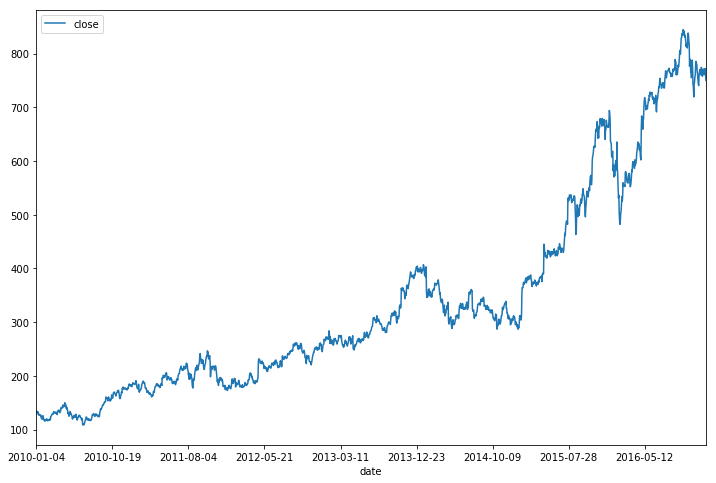

In [7]:
stock_df['close'].plot(figsize=(12,8),legend=True)

In [8]:
stock_df

,close
date,
2010-01-04,133.899994
2010-01-05,134.690002
2010-01-06,132.250000
2010-01-07,130.000000
2010-01-08,133.520004
2010-01-11,130.309998
2010-01-12,127.349998
2010-01-13,129.110001
2010-01-14,127.349998


In [9]:
def index_year(date_year):
  count = 0
  for dates in date_year:
    date_y = dates.split('-')   
    if date_y[0] == '2016':
        count += 1
        
  print("Data that is collected for the year 2016 is:::",count)
 

In [10]:
 try:
  stock_df.apply(index_year(stock_df.index))
except:
        print("")

Data that is collected for the year 2016 is::: 252



In [11]:
#### Train , test split

train_df = stock_df[:-252]
test_df = stock_df[-252:]

In [12]:
train_df.tail()

,close
date,
2015-12-24,662.789978
2015-12-28,675.200012
2015-12-29,693.969971
2015-12-30,689.070007
2015-12-31,675.890015


In [13]:
test_df.head()

,close
date,
2016-01-04,636.989990
2016-01-05,633.789978
2016-01-06,632.650024
2016-01-07,607.940002
2016-01-08,607.049988


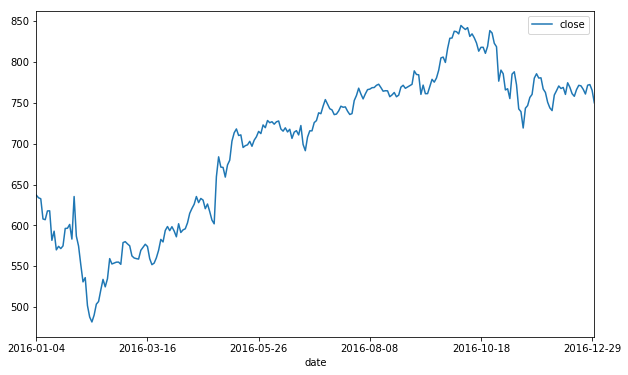

In [14]:
test_df.plot(figsize=(10,6))

In [15]:
### Scaling the data.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()



In [16]:
train_scaled_df = scaler.fit_transform(train_df)
test_scaled_df = scaler.transform(test_df)

In [17]:
### Creating a batch function

def next_batch(training_data,steps,batch_size):
    
    rand_start = np.random.randint(len(training_data) - steps)
    
    y_batch = np.array(training_data[rand_start:rand_start + steps + 1]).reshape(1,steps+1)
    #print(y_batch)
    return y_batch[:,:-1].reshape(-1,steps,1),y_batch[:,1:].reshape(-1,steps,1)


In [18]:
num_inputs = 1
num_outputs = 1
num_neurons = 2000
batch_size = 1
num_iterations = 100
num_time_steps = 20
learning_rate = 0.001

In [19]:
X = tf.placeholder(tf.float32,[None,num_time_steps,num_inputs])
y = tf.placeholder(tf.float32,[None,num_time_steps,num_outputs])

In [20]:
basic_cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=num_neurons,activation=tf.nn.relu),output_size=num_outputs)

In [21]:
lstm_cell = tf.contrib.rnn.OutputProjectionWrapper(
             tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons,activation=tf.nn.relu),output_size=num_outputs)

In [22]:
gru_cell = tf.contrib.rnn.OutputProjectionWrapper(
            tf.contrib.rnn.GRUCell(num_units=num_neurons,activation=tf.nn.relu),output_size=num_outputs)

In [23]:
basic_outputs,basic_states = tf.nn.dynamic_rnn(basic_cell,X,dtype=tf.float32)

In [24]:
#lstm_outputs, lstm_states = tf.nn.dynamic_rnn(lstm_cell,X,dtype=tf.float32)

In [25]:
#gru_outputs, gru_states = tf.nn.dynamic_rnn(gru_cell,X,dtype=tf.float32)

In [26]:
loss = tf.reduce_mean(tf.square(basic_outputs - y))
#tf.reduce_mean(tf.square(lstm_outputs - y))
#


In [27]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_err = optimizer.minimize(loss)

In [28]:
init = tf.global_variables_initializer()

In [29]:
saver = tf.train.Saver()

In [30]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for iterations in range(num_iterations):
        
        x_batch, y_batch = next_batch(train_scaled_df,num_time_steps,batch_size)
        
        sess.run(train_err,feed_dict={X:x_batch,y:y_batch})
        
        if iterations%100 == 0:
            
            mse = loss.eval(feed_dict={X:x_batch,y:y_batch})
            
            print(iterations,'MSE is:',mse)
    
          
    saver.save(sess,'./stock_model')
    

0 MSE is: 0.0983539


In [31]:
test_df.head()

,close
date,
2016-01-04,636.989990
2016-01-05,633.789978
2016-01-06,632.650024
2016-01-07,607.940002
2016-01-08,607.049988


In [32]:
### Predictions

with tf.Session() as sess:
    
    saver.restore(sess,"./stock_model")
    
    train_seed = list(test_scaled_df[:252])
    for iterations in range(len(test_scaled_df)):
        
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1,num_time_steps,1)
        y_pred = sess.run(basic_outputs,feed_dict={X:X_batch})
        #(lstm_outputs,feed_dict={X:X_batch})
        #
        #print(y_pred)
        train_seed.append(y_pred[0,-1,0])

INFO:tensorflow:Restoring parameters from ./stock_model


In [33]:
results = scaler.inverse_transform(np.array(train_seed[252:]).reshape(252,1))

In [34]:
test_df['Predictions'] = results

C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
test_df.head()

,close,Predictions
date,,
2016-01-04,636.989990,768.397217
2016-01-05,633.789978,766.790527
2016-01-06,632.650024,769.112122
2016-01-07,607.940002,772.447998
2016-01-08,607.049988,775.247131
